In [19]:
import warnings

warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import math
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("data/adult.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [22]:
df.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names

obj :workclass


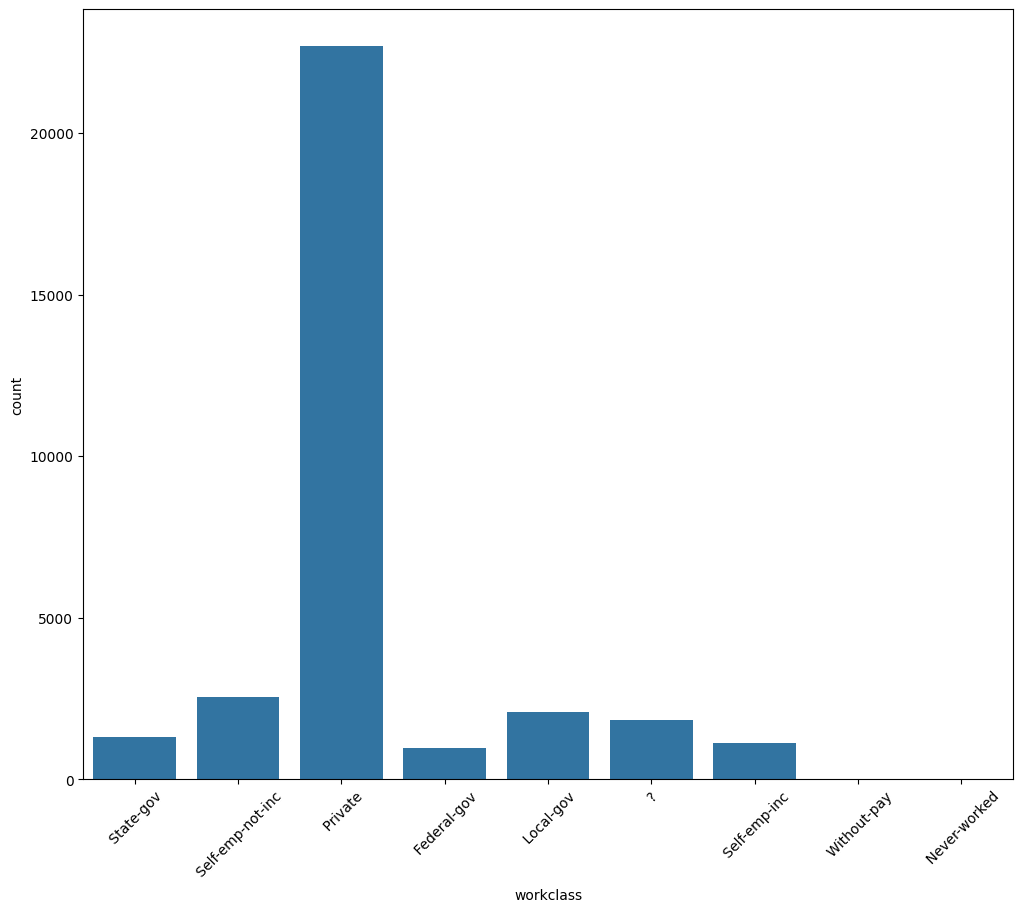

 
obj :education


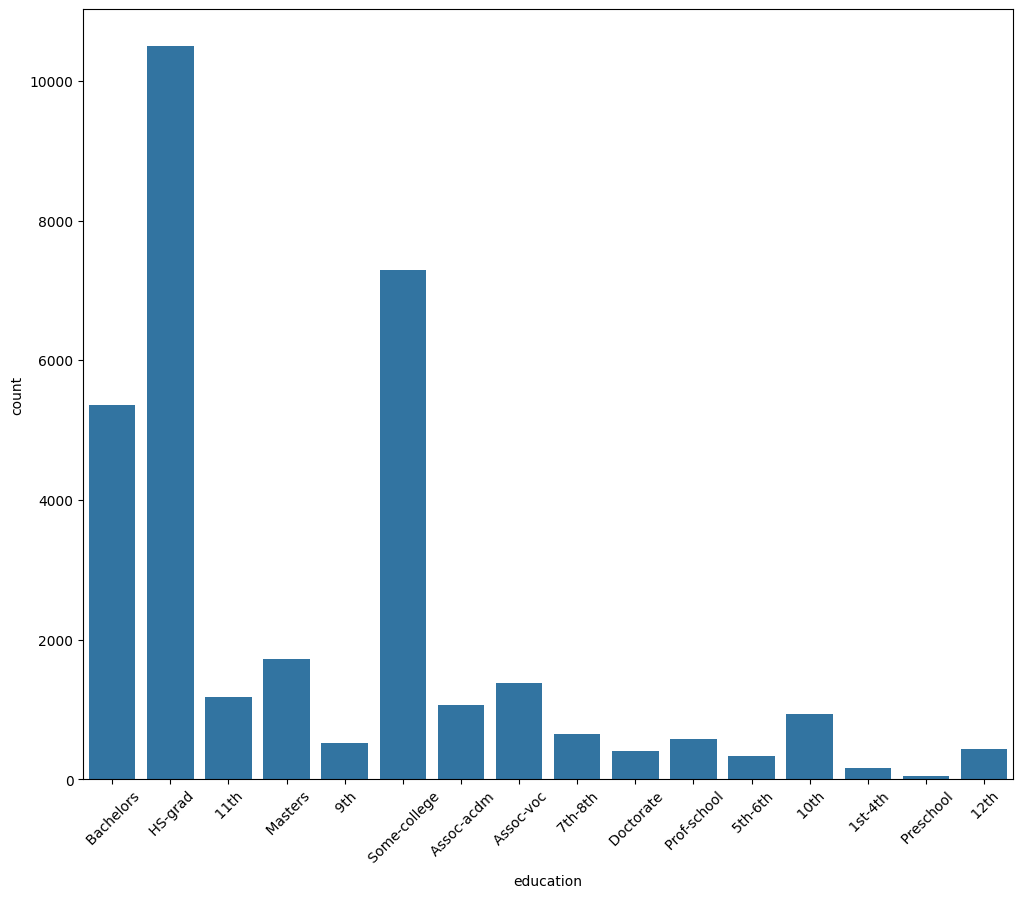

 
obj :marital_status


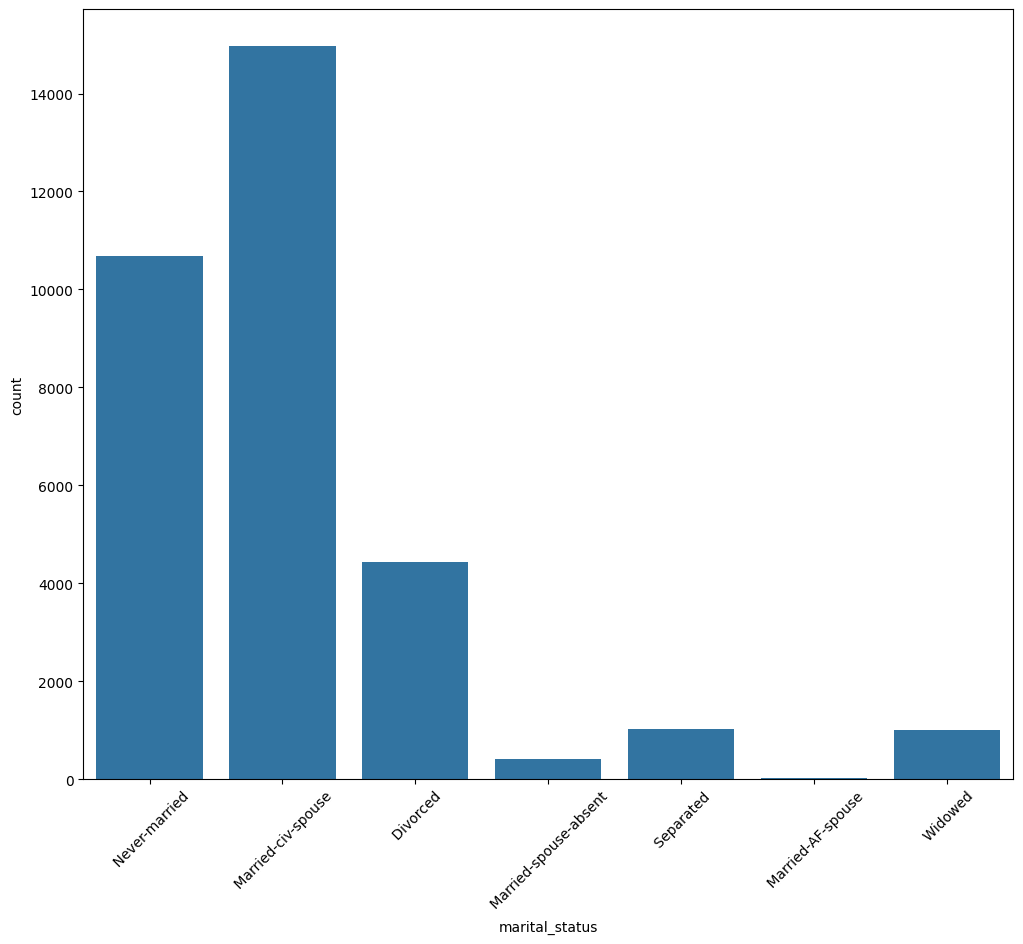

 
obj :occupation


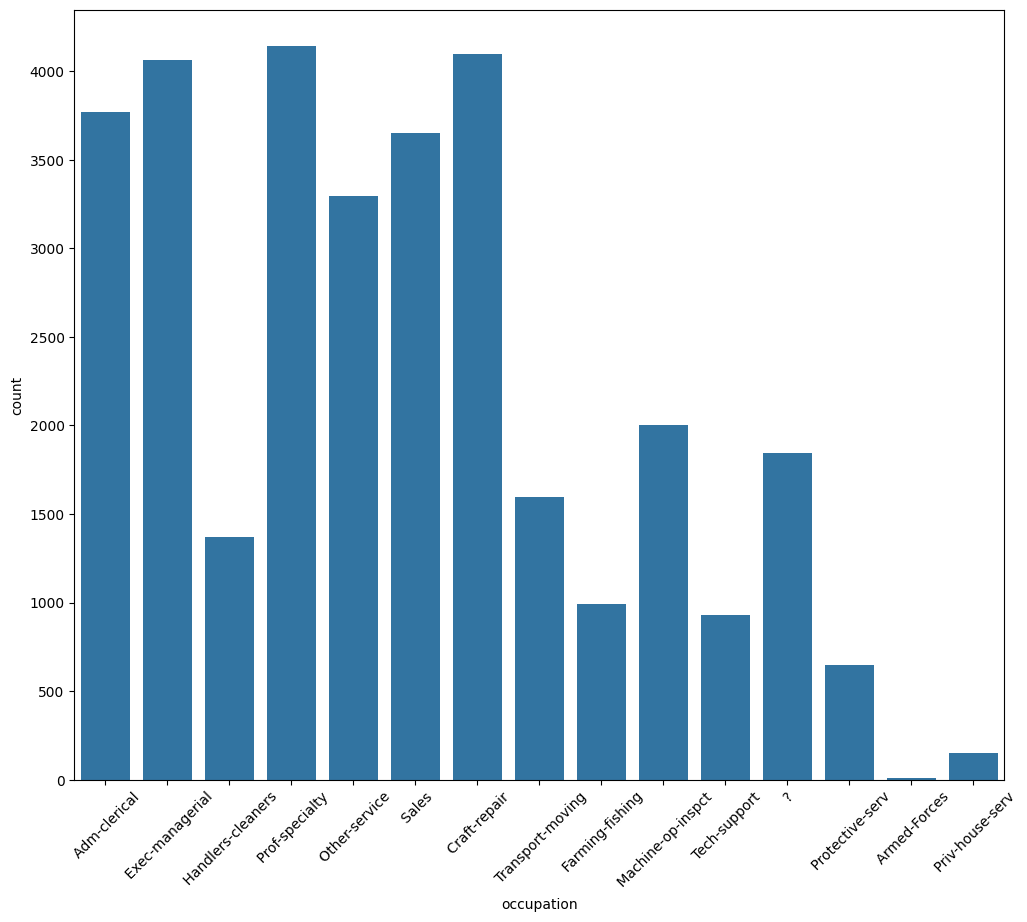

 
obj :relationship


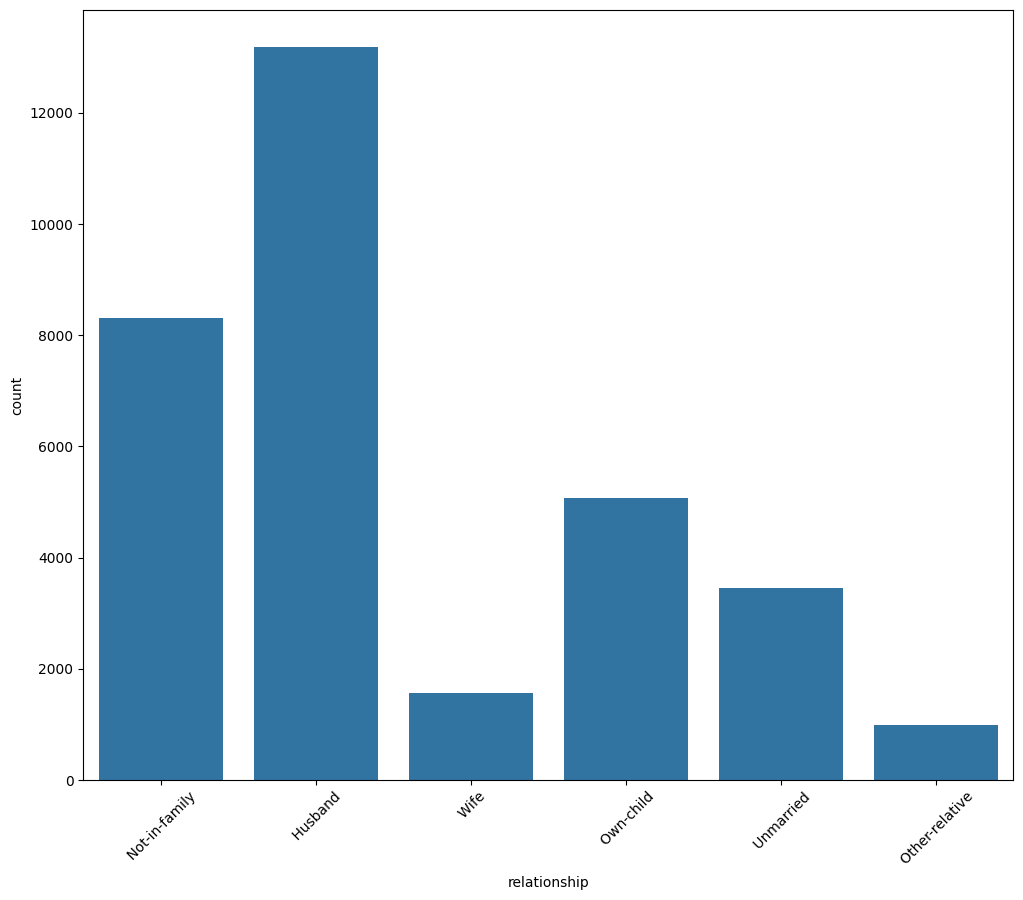

 
obj :race


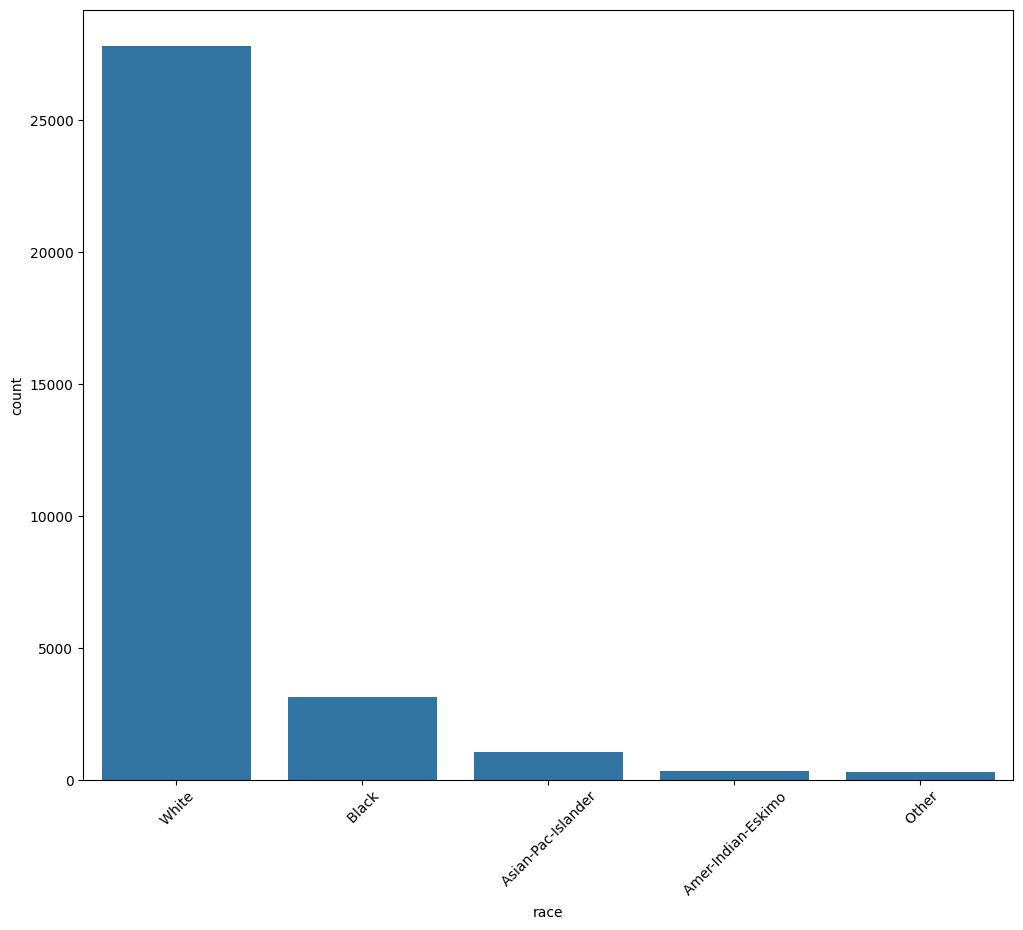

 
obj :sex


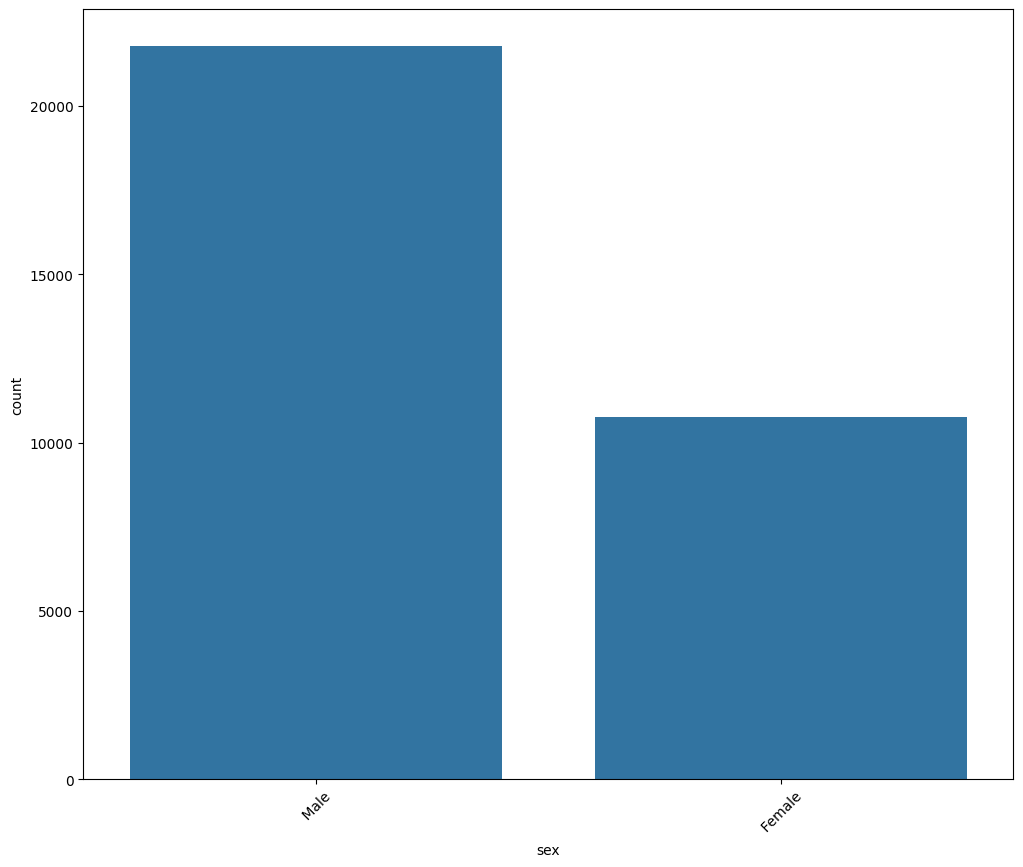

 
obj :native_country


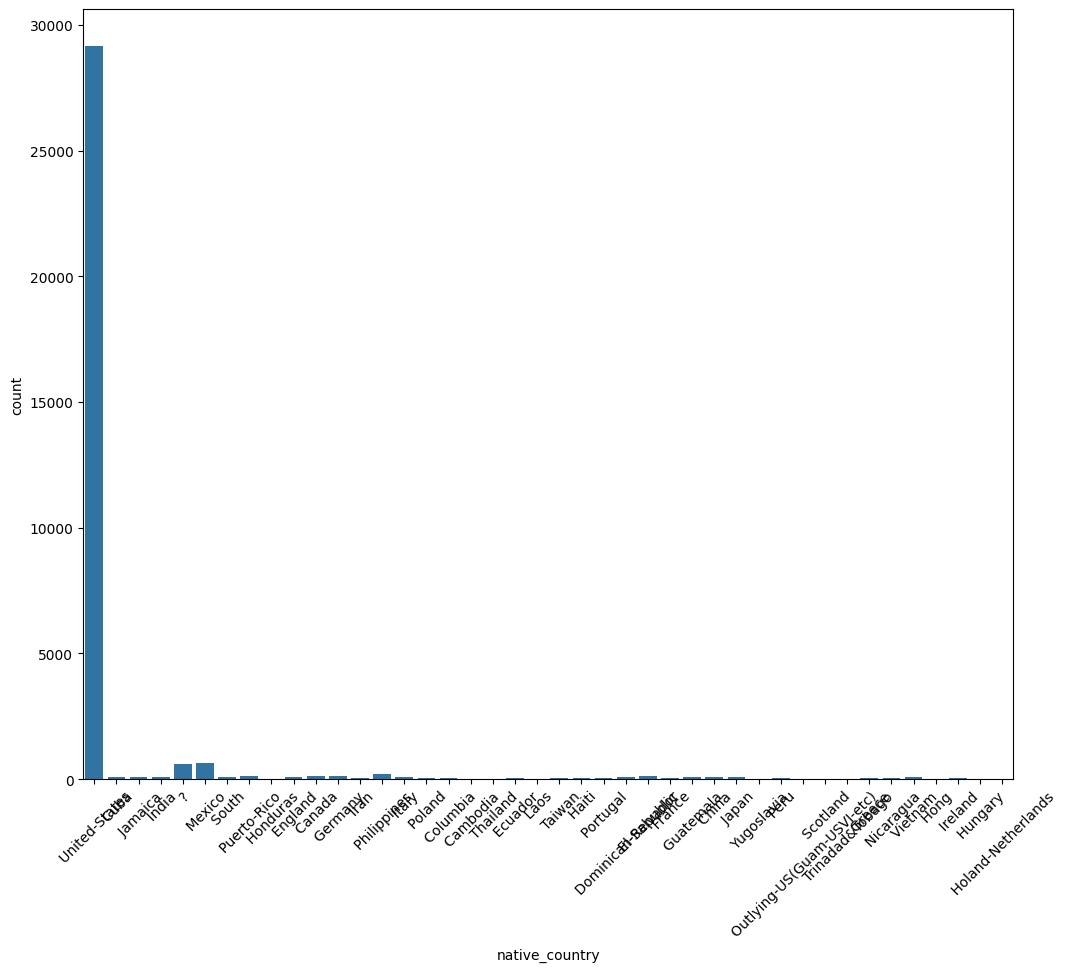

 
obj :income


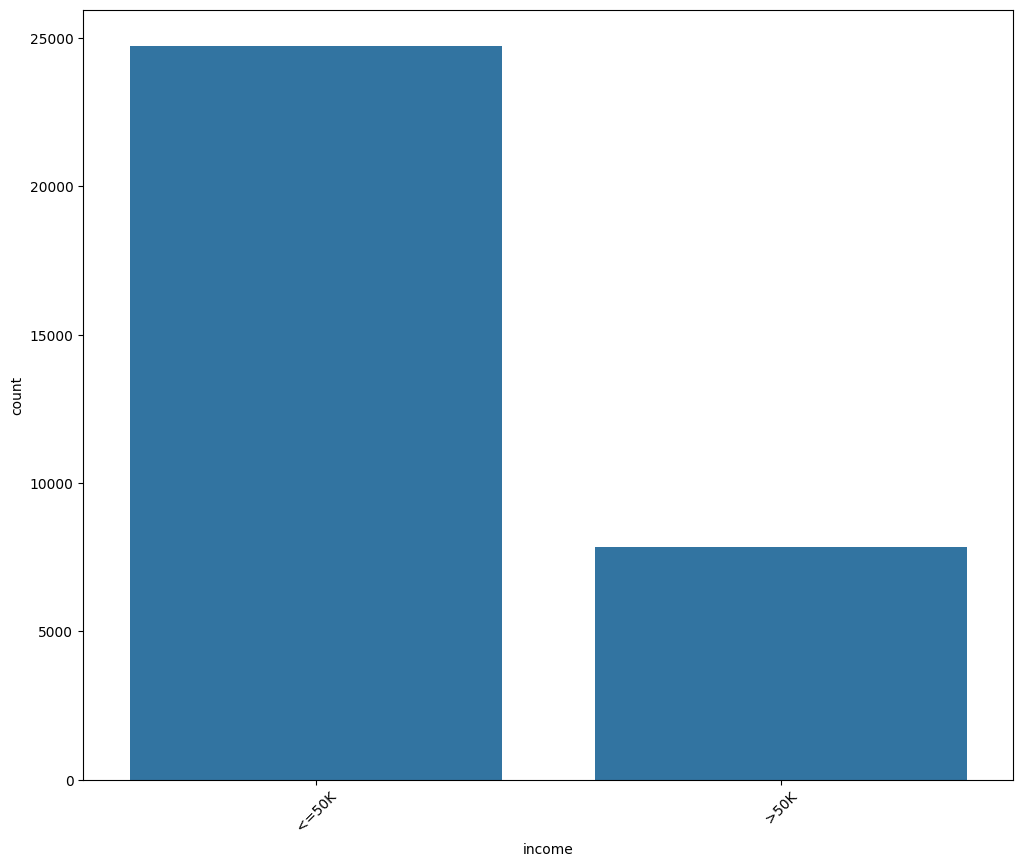

In [24]:
for col in df.columns:
    if df[col].dtype=='O':
        print("obj :"+col)
        plt.figure(figsize=(12,10))
        sns.countplot(x=col, data=df)
        plt.xticks(rotation=45)
        plt.show()
        print(" ")

In [25]:
categorical = [var for var in df.columns if df[var].dtype=='O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [26]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [27]:
for var in categorical:
    print(df[var].value_counts())
    print("#####")
    print()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
#####

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
#####

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
#####

occupation
Prof-specialty       4140
Craft-repair         4099


In [28]:
df['workclass'].replace(' ?', np.NaN, inplace=True)
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [29]:
df = df[df.occupation != ' ?']
df = df[df.workclass != ' ?']
df = df[df.native_country != ' ?']

In [30]:
df['occupation'].isnull().sum()

0

In [31]:
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [32]:
for var in numerical:
    print(df[var].value_counts())
    print("#####")
    print()

age
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: count, Length: 72, dtype: int64
#####

fnlwgt
203488    13
123011    12
113364    12
164190    12
121124    12
          ..
275818     1
318082     1
138342     1
158040     1
201490     1
Name: count, Length: 20263, dtype: int64
#####

education_num
9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: count, dtype: int64
#####

capital_gain
0        27624
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: count, Length: 118, dtype: int64
#####

capital_loss
0       28735
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: count, Length: 90, dtyp

In [33]:
X = df.drop(['income'], axis=1)

In [34]:
y = df['income']
X = df[numerical]
np.unique(y)
X.loc[list(y[y=='<=50k'].index),:]
(y[y=='<=50k'].index)
X.loc[1,:].values

array([   50, 83311,    13,     0,     0,    13], dtype=int64)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

In [36]:
X_train.shape, X_test.shape
X_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,24129.000000,2.412900e+04,24129.000000,24129.000000,24129.000000,24129.000000
mean,38.397116,1.897232e+05,10.122591,1111.470844,86.485847,40.899416
std,13.142879,1.062856e+05,2.548155,7486.607590,399.951431,11.961482
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.174440e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781470e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.369930e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [37]:
class Gauss_NB():
    
    def __init__(self):
        self.classes = []
        self.priors = {}
        self.class_count = {}
        self.class_x = {}
        self.means = {}
        self.stds = {}
        
    def prob_normalD(self, x, mean, std):
        res = 1
        for i in range(len(x)):
            out = math.exp(-((x[i] - mean[i]) ** 2 / (2 * (std[i] ** 2))))
            res *= (1 / (math.sqrt(2 * math.pi) * std[i])) * out
        return res
    
    def fit(self,X,y):
        self.classes,counts = np.unique(y,return_counts=True)
        self.class_count = dict(zip(self.classes,counts))
        m,n = X.shape
        for cls in self.classes:
            # print(list(y[y==cls].index))
            self.class_x[cls] = X.loc[list(y[y==cls].index),:]
            self.means[cls] = self.class_x[cls].mean().values
            self.stds[cls] = self.class_x[cls].std().values
            self.priors[cls] = self.class_count[cls]/m
        print("Priors are as follows: ",self.priors)
        
        
    def predict(self,X):
        res = []
        print(X.shape)
        for i in X.index:
            x= X.loc[i,:].values
            out ,mx ='', 0
            for cls in self.classes:
                conditionals = self.prob_normalD(x,mean=self.means[cls],std=self.stds[cls])*self.priors[cls]
                if conditionals > mx:
                    out = cls
                    mx = conditionals
            res.append(out)
    
        return res
    

In [40]:
gb = Gauss_NB()

## fitting
gb.fit(X_train,y_train)

## predicting
y_test_pred = gb.predict(X_test)
np.unique(y_test_pred,return_counts=True)

Priors are as follows:  {' <=50K': 0.7508806829955655, ' >50K': 0.2491193170044345}
(6033, 6)


(array([' <=50K', ' >50K'], dtype='<U6'), array([5335,  698], dtype=int64))

<Axes: >

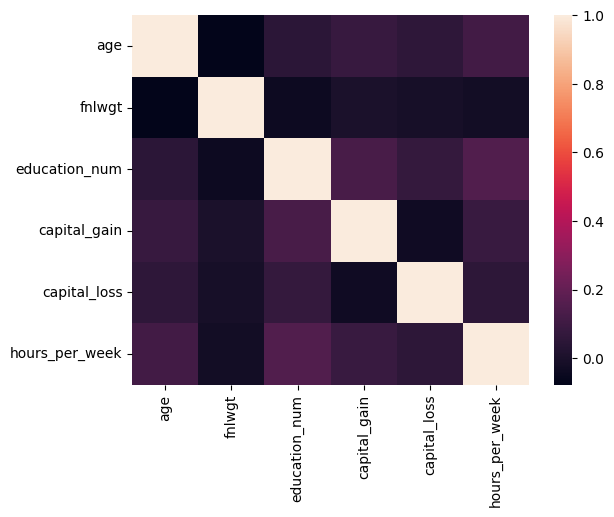

In [41]:
sns.heatmap(X_train.corr())

In [42]:
cat,count = np.unique(df[categorical]['workclass'],return_counts=True)
categorical
classes,counts = np.unique(y,return_counts=True)
classes,counts

X = df[['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=40)
X

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [56]:
class Categorical_NB():
    
    def __init__(self):
        self.classes = []
        self.priors = {}
        self.class_count = {}
        self.class_x = {}
        self.m = 0
        # categorical
        self.feat_counts= {}
        
        
        
        # gaussian
#         self.means = {}
#         self.stds = {}
        
    
    
    def fit(self,X,y):
        self.classes,counts = np.unique(y,return_counts=True)
        self.class_count = dict(zip(self.classes,counts))
        self.m,n = X.shape
        for cls in self.classes:
#             print(list(y[y==cls].index))
            self.class_x[cls] = X.loc[list(y[y==cls].index),:]
            print(self.class_x[cls])
           
            ## categorical
            self.feat_counts[cls]= {}
            for column in X.columns:
                possible_cat,count = np.unique(self.class_x[cls][column],return_counts=True)
                self.feat_counts[cls][column] = dict(zip(possible_cat,count))
                print(self.feat_counts[cls][column])
            
#             self.means[cls] = self.class_x[cls].mean().values
#             self.stds[cls] = self.class_x[cls].std().values
            self.priors[cls] = self.class_count[cls]/self.m
    
        print("Priors are as follows: ",self.priors)
        print(self.feat_counts)
        
        
    def predict(self,X):
        res = []
        print(X.shape)
        for i in X.index:
            out ,mx ='', 0
            for cls in self.classes:
                conditionals=1
                
                for col in X.columns:
                    val = X[col][i]
                    if val in self.feat_counts[cls][col]:
                        # print(col," ",val)
                        conditionals*=(self.feat_counts[cls][col][val]/self.class_count[cls])
                        # print(self.feat_counts[cls][col][val])
                    
                    else:
                        conditionals*=0.01
                    
                conditionals *= self.priors[cls]
                if conditionals > mx:
                    out = cls
                    mx = conditionals
            res.append(out)
    
        return res

In [44]:
 X.loc[list(y[y==' <=50k'].index),:]

,workclass,education,marital_status,occupation,relationship,race,sex,native_country


In [59]:
cnb = Categorical_NB()
cnb.fit(X_train,y_train)
cnb.predict(X_train)
np.unique(res,return_counts=True)

               workclass      education          marital_status  \
7937             Private   Some-college           Never-married   
19371            Private      Bachelors           Never-married   
22313   Self-emp-not-inc           10th      Married-civ-spouse   
24941        Federal-gov        HS-grad   Married-spouse-absent   
9309             Private        HS-grad      Married-civ-spouse   
...                  ...            ...                     ...   
23537            Private   Some-college      Married-civ-spouse   
29828   Self-emp-not-inc           11th      Married-civ-spouse   
15656            Private      Bachelors      Married-civ-spouse   
15716            Private   Some-college                Divorced   
12532            Private           10th      Married-civ-spouse   

             occupation relationship    race      sex  native_country  
7937      Other-service    Own-child   White   Female   United-States  
19371   Exec-managerial    Own-child   White   Fema

NameError: name 'res' is not defined

In [63]:
print(classification_report(cnb.predict(X_train),y_train))
print(confusion_matrix(cnb.predict(X_train),y_train))

(21113, 8)


array([[12719,  1340],
       [ 3136,  3918]], dtype=int64)

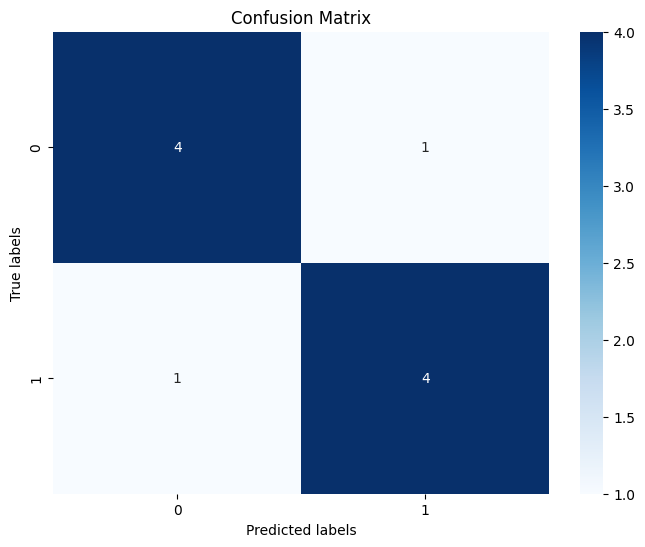

In [67]:
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()